In [1]:
%load_ext rpy2.ipython
%R require(ggplot2)
%matplotlib inline

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Find out what's changed in ggplot2 at
http://github.com/tidyverse/ggplot2/releases.

  warnings.warn(x, RRuntimeWarning)


In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pylab as plb
from scipy import stats
import pandas as pd

In [3]:
df = pd.read_table('dna_sp_out.out', engine='python', skipfooter=3)

In [4]:
df['sRNA'] = df['Datafile'].apply(lambda x: x.split('_cmaligned')[0])

In [5]:
df

,Datafile,Region,Ingroup,Outgroup,n,Sites,NetSites,S,Eta,Hap,...,G+Gc,G+Ctot,TajimaD,SigD,FuLiD*,SigD.1,FuLiF*,SigF,FuFs,sRNA
0,ArcZ_ST_rf_cmaligned_no_dots.fas,1-105,14,0,14,105,105,0,0,1,...,0.0,0.5714,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,ArcZ_ST_rf
1,ChiX_sroB_ST_rf_cmaligned_no_dots.fas,1-81,14,0,14,81,81,0,0,1,...,0.0,0.4198,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,ChiX_sroB_ST_rf
2,DsrA_ST_rf_cmaligned_no_dots.fas,1-84,14,0,14,84,84,1,1,2,...,0.0,0.4634,-1.1552,n.s.,-1.3975,n.s.,-1.5139,n.s.,-0.595,DsrA_ST_rf
3,Esr4_EC_cmaligned_no_dots.fas,1-233,14,0,14,233,233,7,7,6,...,0.0,0.3811,-1.4425,n.s.,-1.4769,n.s.,-1.6766,n.s.,-2.076,Esr4_EC
4,Esr6_EC_cmaligned_no_dots.fas,1-100,14,0,14,100,100,2,2,3,...,0.0,0.4343,0.2261,n.s.,-0.4457,n.s.,-0.3106,n.s.,0.086,Esr6_EC
5,Esr10_EC_cmaligned_no_dots.fas,1-94,14,0,14,94,94,0,0,1,...,0.0,0.4681,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,Esr10_EC
6,ffs_EC_rf_cmaligned_no_dots.fas,1-97,14,0,14,97,97,1,1,2,...,0.0,0.5972,-1.1552,n.s.,-1.3975,n.s.,-1.5139,n.s.,-0.595,ffs_EC_rf
7,FnrS_ST_rf_cmaligned_no_dots.fas,1-118,14,0,14,118,118,5,5,4,...,0.0,0.4522,-0.2438,n.s.,0.5052,n.s.,0.3517,n.s.,0.428,FnrS_ST_rf
8,GcvB_ST_rf_cmaligned_no_dots.fas,1-206,14,0,14,206,198,0,0,1,...,0.0,0.4495,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,GcvB_ST_rf
9,GlmY_ST_rf_cmaligned_no_dots.fas,1-148,14,0,14,148,148,4,4,5,...,0.0,0.5125,-1.1644,n.s.,-0.5548,n.s.,-0.8134,n.s.,-2.170,GlmY_ST_rf


In [6]:
df.set_index('sRNA', inplace=True)

In [7]:
%store -r sal_age

In [9]:
sal_age.set_index('name', inplace=True)

In [10]:
df = df.join(sal_age[['age_bin']])

In [11]:
df

,Datafile,Region,Ingroup,Outgroup,n,Sites,NetSites,S,Eta,Hap,...,G+Gc,G+Ctot,TajimaD,SigD,FuLiD*,SigD.1,FuLiF*,SigF,FuFs,age_bin
sRNA,,,,,,,,,,,,,,,,,,,,,
ArcZ_ST_rf,ArcZ_ST_rf_cmaligned_no_dots.fas,1-105,14,0,14,105,105,0,0,1,...,0.0,0.5714,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,old
ChiX_sroB_ST_rf,ChiX_sroB_ST_rf_cmaligned_no_dots.fas,1-81,14,0,14,81,81,0,0,1,...,0.0,0.4198,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,old
DsrA_ST_rf,DsrA_ST_rf_cmaligned_no_dots.fas,1-84,14,0,14,84,84,1,1,2,...,0.0,0.4634,-1.1552,n.s.,-1.3975,n.s.,-1.5139,n.s.,-0.595,old
Esr4_EC,Esr4_EC_cmaligned_no_dots.fas,1-233,14,0,14,233,233,7,7,6,...,0.0,0.3811,-1.4425,n.s.,-1.4769,n.s.,-1.6766,n.s.,-2.076,teenage
Esr6_EC,Esr6_EC_cmaligned_no_dots.fas,1-100,14,0,14,100,100,2,2,3,...,0.0,0.4343,0.2261,n.s.,-0.4457,n.s.,-0.3106,n.s.,0.086,old
Esr10_EC,Esr10_EC_cmaligned_no_dots.fas,1-94,14,0,14,94,94,0,0,1,...,0.0,0.4681,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,teenage
ffs_EC_rf,ffs_EC_rf_cmaligned_no_dots.fas,1-97,14,0,14,97,97,1,1,2,...,0.0,0.5972,-1.1552,n.s.,-1.3975,n.s.,-1.5139,n.s.,-0.595,old
FnrS_ST_rf,FnrS_ST_rf_cmaligned_no_dots.fas,1-118,14,0,14,118,118,5,5,4,...,0.0,0.4522,-0.2438,n.s.,0.5052,n.s.,0.3517,n.s.,0.428,old
GcvB_ST_rf,GcvB_ST_rf_cmaligned_no_dots.fas,1-206,14,0,14,206,198,0,0,1,...,0.0,0.4495,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,old


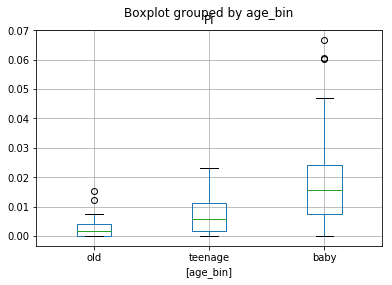

In [12]:
df[['Pi', 'age_bin']].boxplot(by='age_bin')

In [13]:
df.age_bin.value_counts()

baby       60
teenage    28
old        28
Name: age_bin, dtype: int64

#### Grab genome coordinates for ST4/74

In [14]:
cd ~/workspace/bio/sRNA/salmonella/

/Users/aug/workspace/bio/sRNA/salmonella


In [15]:
blast = pd.read_excel('sal_pa_matrix.xlsx', sheet_name='nr_BLAST')

In [17]:
st = blast[blast.sseqid == 'NC_016857.1']

In [24]:
st = st[['qseqid', 'sstart', 'ssend', 'sframe']]

In [35]:
st.rename(columns={'qseqid': 'name', 'sstart': 'start', 'ssend': 'end', 'sframe': 'strand'}, inplace=True)

/Users/aug/.ve/bio/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [37]:
st.set_index('name', inplace=True)

In [38]:
st

,start,end,strand
name,,,
rnpB_EC_rf,3435882,3435508,-1
STnc3610_ST,1850400,1850045,-1
tpke70_ST,2513722,2513324,-1
STnc170_rf,1562969,1562637,-1
STnc1270_ST,1789691,1789368,-1
STnc150_rf,1282767,1282502,-1
Esr4_EC,2320064,2319832,-1
STnc3250_ST,223676,223451,-1
STnc1740_ST,4683513,4683334,-1


In [39]:
st.to_csv('st4_sal_srnas.csv')